In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistical and time series libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Prophet model for forecasting
from prophet import Prophet

# Deep Learning libraries (optional for LSTM approach)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Evaluation metric
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# reading the dataset
df_sales = pd.read_excel('/content/Pizza_Sale.xlsx')
df_ingredients = pd.read_excel('/content/Pizza_ingredients.xlsx')

In [ ]:
df_sales.shape

(48620, 12)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
# Checking unique values in each column
df_sales.nunique()

,0
pizza_id,48620
order_id,21350
pizza_name_id,91
quantity,4
order_date,358
order_time,16382
unit_price,25
total_price,56
pizza_size,5
pizza_category,4


# Handling Missing Values

In [ ]:
df_sales.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
df_sales.dropna(inplace=True)

In [ ]:
df_sales.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


# Checking for Duplicates

In [ ]:
# Checking duplicates
df_sales.duplicated().sum()

np.int64(0)

# Formating the Date and Time

In [ ]:
# converting order date and time to datetime fromat
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], format='mixed')
df_sales['order_time'] = pd.to_datetime(df_sales['order_time'], format='%H:%M:%S').dt.time
df_sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Exploratory Data Analysis (EDA)

In [ ]:
df_sales.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48554.000000,48554.000000,48554.000000,48554,48554.000000,48554.000000
mean,24342.866458,10715.733081,1.019648,2015-06-29 00:59:45.616015104,16.493957,16.821744
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12205.250000,5360.250000,1.000000,2015-03-30 00:00:00,12.750000,12.750000
50%,24343.500000,10702.000000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36481.750000,16107.750000,1.000000,2015-09-29 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14017.563232,6172.205962,0.143172,NaN,3.621876,4.438471


##### Daily sales trend over time

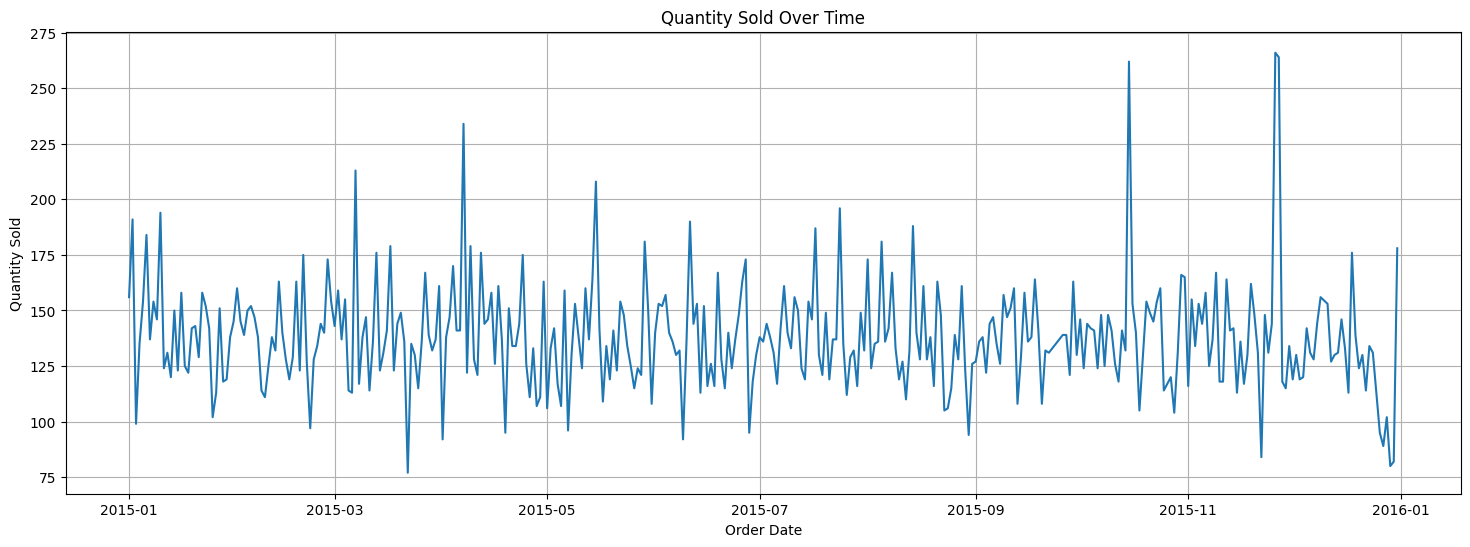

In [ ]:
daily_sales = df_sales.groupby('order_date').agg({'quantity': 'sum'})

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

##### Top Selling Pizzas

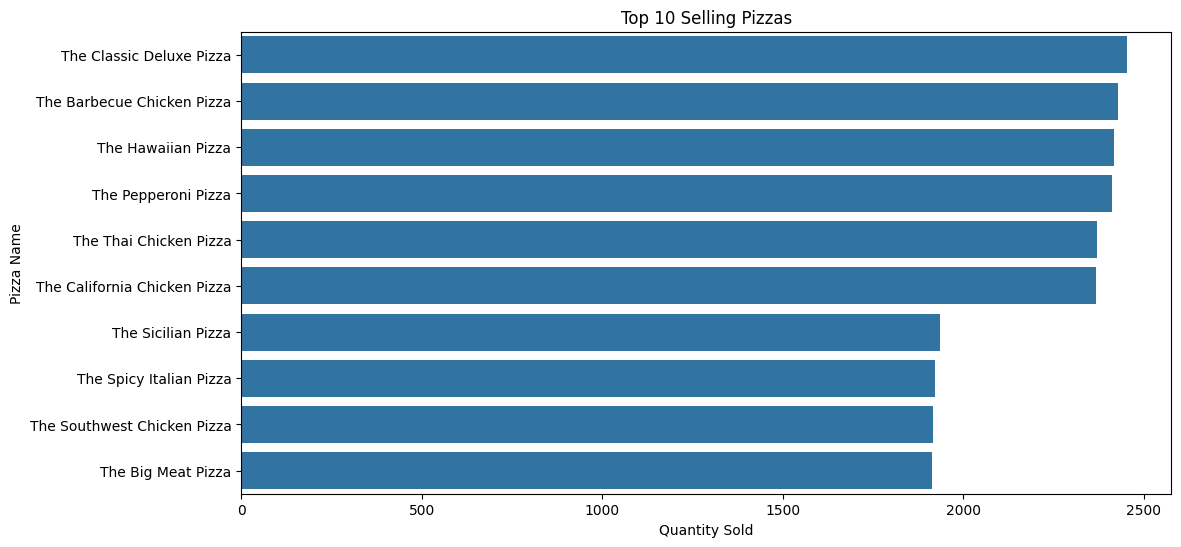

In [ ]:
# Group by pizza and calculate total sales
top_pizzas = df_sales.groupby('pizza_name').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

# Plot top-selling pizzas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pizzas['quantity'].head(10), y=top_pizzas.head(10).index)
plt.title('Top 10 Selling Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

##### Sales by day of week

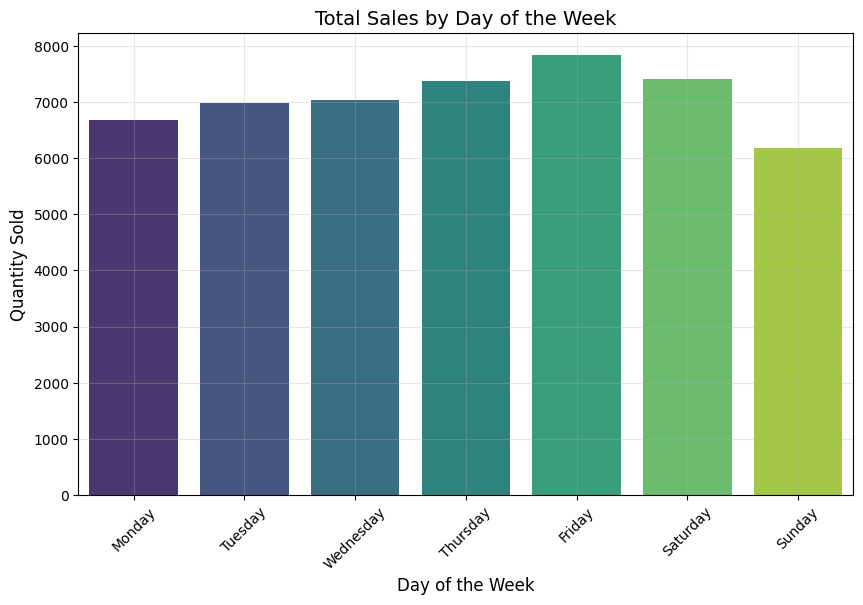

In [ ]:
# Add a day of the week column
df_sales['day_of_week'] = df_sales['order_date'].dt.day_name()

# Group by day of the week
sales_by_day = df_sales.groupby('day_of_week').agg({'quantity': 'sum'}).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day['quantity'], palette="viridis")
plt.title('Total Sales by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

##### Sales By Month

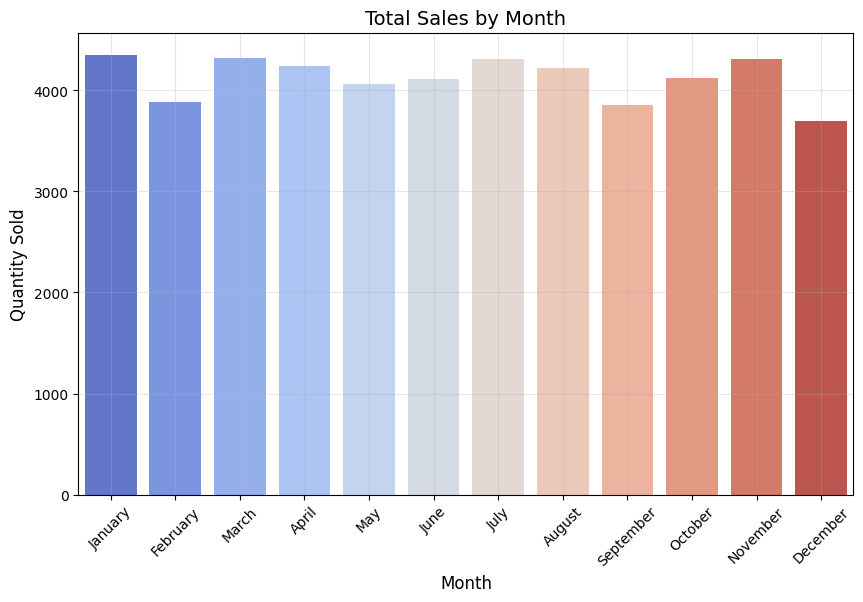

In [ ]:
# Add a month column
df_sales['month'] = df_sales['order_date'].dt.month_name()

# Group by month
sales_by_month = df_sales.groupby('month').agg({'quantity': 'sum'}).reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot sales by month
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month['quantity'], palette="coolwarm")
plt.title('Total Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

##### Peak selling hours in a day

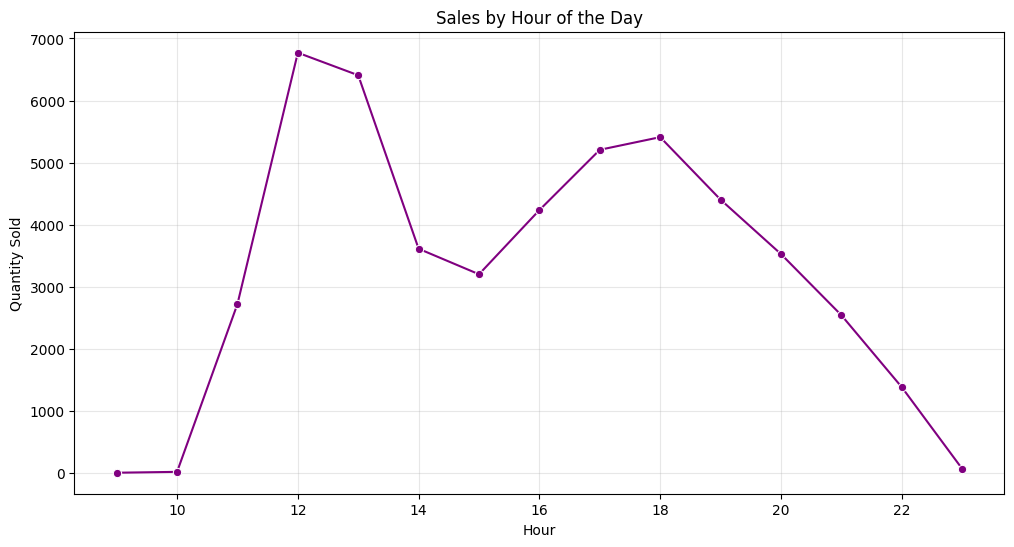

In [ ]:
df_sales['hour'] = pd.to_datetime(df_sales['order_time'], format='%H:%M:%S').dt.hour
sales_by_hour = df_sales.groupby('hour')['quantity'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o', color='purple')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Quantity Sold')
plt.grid(alpha=0.3)
plt.show()


# Outlier Detection

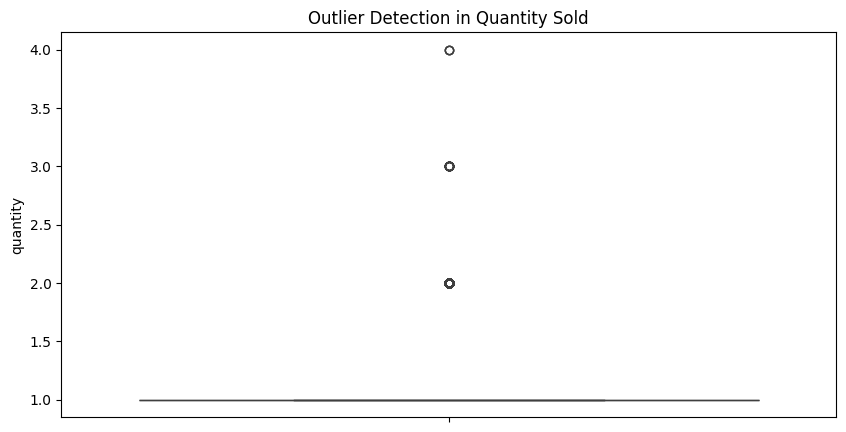

In [ ]:
# Plot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df_sales['quantity'])
plt.title('Outlier Detection in Quantity Sold')
plt.show()

In [ ]:
# Remove extreme outliers if necessary
df_sales = df_sales[df_sales['quantity'] < df_sales['quantity'].quantile(0.99)]

The 99th percentile typically excludes the top 1% of values, which are often extreme outliers in large dataset


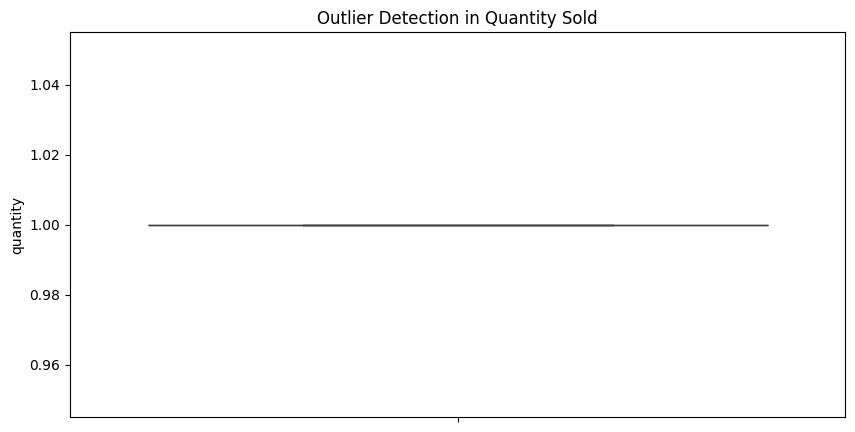

In [ ]:
# Plot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df_sales['quantity'])
plt.title('Outlier Detection in Quantity Sold')
plt.show()

# Check for Stationarity

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print('✅ Stationary series (reject H0)')
    else:
        print('❌ Non-stationary series (fail to reject H0)')

adf_test(daily_sales)

ADF Statistic: -4.9194
p-value: 0.0000
✅ Stationary series (reject H0)


Plot ACF and PACF:

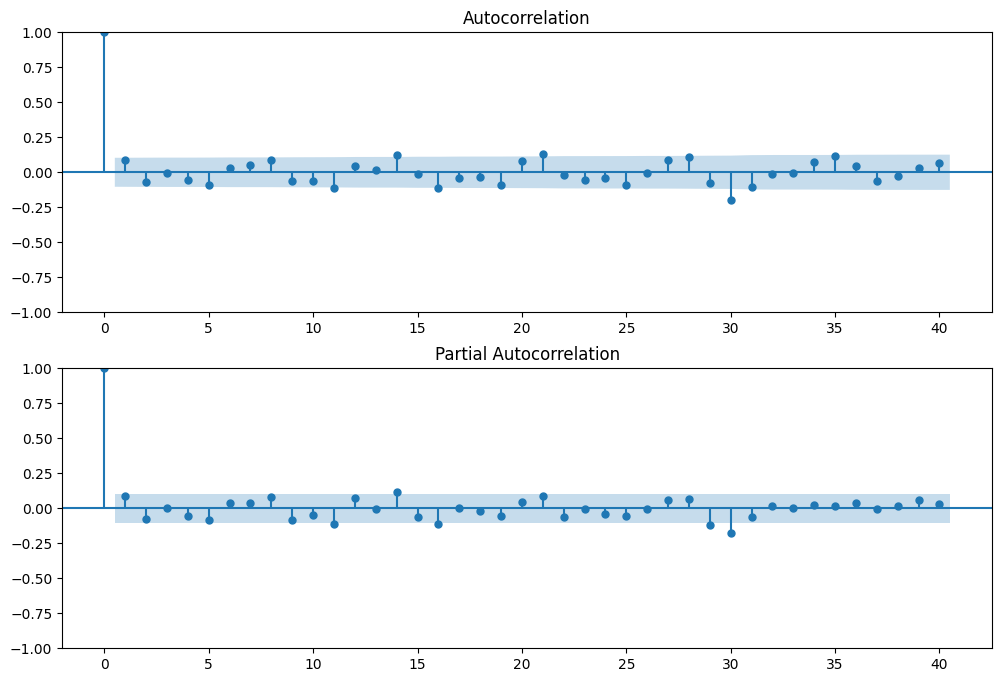

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_sales, lags=40, ax=axes[0])
plot_pacf(daily_sales, lags=40, ax=axes[1])
plt.show()

# Model Building

In [ ]:
# Create pivot of pizzas and daily sales
data = df_sales.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)
one_pizza = data['The Barbecue Chicken Pizza']

# Train-test split (last 30 days for testing)
train = one_pizza[:-30]
test = one_pizza[-30:]

##### ARIMA Model

ARIMA MAPE: 0.5341


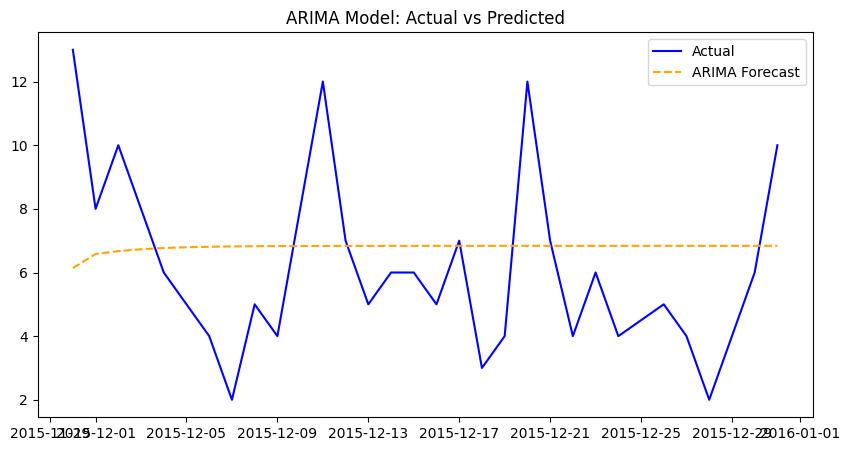

In [ ]:
train.index = pd.to_datetime(train.index)
train = train.asfreq('D')

arima_model = ARIMA(train, order=(1, 0, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

arima_mape = mean_absolute_percentage_error(test, arima_forecast)
print(f"ARIMA MAPE: {arima_mape:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--')
plt.legend(); plt.title('ARIMA Model: Actual vs Predicted')
plt.show()

##### SARIMA Model

In [ ]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test))

sarima_mape = mean_absolute_percentage_error(test, sarima_forecast)
print(f"SARIMA MAPE: {sarima_mape:.4f}")

SARIMA MAPE: 0.5121


##### Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpub3g0pli/_o4t6bif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpub3g0pli/efclwytk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41737', 'data', 'file=/tmp/tmpub3g0pli/_o4t6bif.json', 'init=/tmp/tmpub3g0pli/efclwytk.json', 'output', 'file=/tmp/tmpub3g0pli/prophet_modeld3ufqeu5/prophet_model-20251009210718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:07:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:07:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAPE: 0.5107


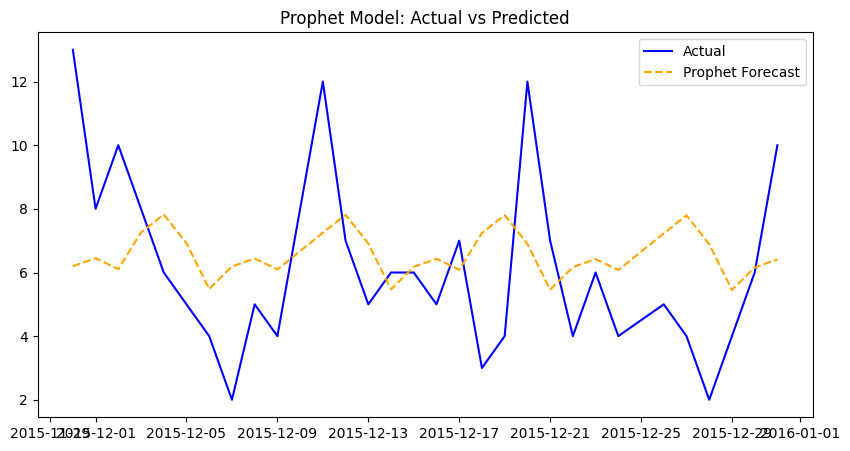

In [ ]:
prophet_data = one_pizza.reset_index()
prophet_data.columns = ['ds', 'y']

prophet_train = prophet_data[:-30]
prophet_test = prophet_data[-30:]

prophet_model = Prophet()
prophet_model.fit(prophet_train)

future_dates = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future_dates)

prophet_test_forecast = prophet_forecast.iloc[-30:]['yhat']
prophet_mape = mean_absolute_percentage_error(prophet_test['y'], prophet_test_forecast)

print(f"Prophet MAPE: {prophet_mape:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual', color='blue')
plt.plot(prophet_test['ds'], prophet_test_forecast, label='Prophet Forecast', color='orange', linestyle='--')
plt.legend(); plt.title('Prophet Model: Actual vs Predicted')
plt.show()

##### Forecast for All Pizzas (Next 7 Days)

In [ ]:
all_forecasts = {}

for pizza in data.columns:
    pizza_df = data[pizza].reset_index()
    pizza_df.columns = ['ds', 'y']

    model = Prophet()
    model.fit(pizza_df)

    future_dates = model.make_future_dataframe(periods=7)
    forecast = model.predict(future_dates)
    all_forecasts[pizza] = forecast.iloc[-7:]['yhat'].values

# Combine forecasts into a single DataFrame
forecast_df = pd.DataFrame(all_forecasts, index=pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=7))
forecast_df = forecast_df.round()
forecast_df.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpub3g0pli/ddeqz_gs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpub3g0pli/zvp3_pqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52638', 'data', 'file=/tmp/tmpub3g0pli/ddeqz_gs.json', 'init=/tmp/tmpub3g0pli/zvp3_pqg.json', 'output', 'file=/tmp/tmpub3g0pli/prophet_modelrru3njev/prophet_model-20251009210759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2016-01-01,8.0,6.0,1.0,3.0,8.0,3.0,3.0,8.0,4.0,6.0,...,5.0,6.0,3.0,6.0,6.0,3.0,3.0,5.0,7.0,5.0
2016-01-02,7.0,6.0,1.0,3.0,7.0,3.0,3.0,7.0,3.0,6.0,...,4.0,6.0,3.0,5.0,6.0,3.0,2.0,4.0,7.0,4.0
2016-01-03,5.0,5.0,2.0,2.0,6.0,2.0,2.0,6.0,3.0,5.0,...,4.0,5.0,2.0,4.0,5.0,3.0,2.0,3.0,6.0,4.0
2016-01-04,6.0,5.0,2.0,3.0,6.0,3.0,3.0,7.0,3.0,5.0,...,4.0,4.0,2.0,5.0,5.0,2.0,2.0,4.0,7.0,4.0
2016-01-05,6.0,5.0,2.0,3.0,6.0,3.0,2.0,7.0,4.0,5.0,...,4.0,5.0,3.0,5.0,5.0,3.0,2.0,3.0,6.0,4.0


##### Ingredient Purchase Order Forecast

In [ ]:
ingredients = pd.read_excel('/content/Pizza_ingredients.xlsx')

ingredient_forecast = []

for pizza in forecast_df.columns:
    total_sales = forecast_df[pizza].sum()
    pizza_ingredients = ingredients[ingredients['pizza_name'] == pizza]

    for _, row in pizza_ingredients.iterrows():
        ingredient_forecast.append({
            'ingredient': row['pizza_ingredients'],
            'quantity_needed': total_sales * row['Items_Qty_In_Grams']
        })

ingredient_forecast_df = pd.DataFrame(ingredient_forecast)

# Summarize by ingredient
final_purchase_order = (
    ingredient_forecast_df.groupby('ingredient')['quantity_needed']
    .sum()
    .reset_index()
)
final_purchase_order['unit'] = 'grams'

print("Final Purchase Order for Next 7 Days:")
pd.set_option('display.max_rows', None)
final_purchase_order


Final Purchase Order for Next 7 Days:


,ingredient,quantity_needed,unit
0,?duja Salami,2400.0,grams
1,Alfredo Sauce,900.0,grams
2,Anchovies,2380.0,grams
3,Artichokes,7155.0,grams
4,Arugula,870.0,grams
5,Asiago Cheese,3900.0,grams
6,Bacon,18930.0,grams
7,Barbecue Sauce,1350.0,grams
8,Barbecued Chicken,4050.0,grams
9,Beef Chuck Roast,15960.0,grams
